# **Main Objective**

The main objective is to practice knowledge of Data Analysis, Machine Learning and Statistics. For this, a Business Process Intelligence (BPI) data set was selected.

# **About Dataset**

The dataset was found on the [website](https://www.win.tue.nl/bpi/doku.php?id=2017:challenge) of the 13th International Business Process Intelligence Workshop 2017.

The logs refer to a loan application process of a Dutch financial institute. The data includes all the loan process logs including offers made by the company for accepted loan applications.

For more information about the data, you can consult the [event page](https://www.win.tue.nl/bpi/doku.php?id=2017:challenge) in the 'The Data' section or directly in the [page](https://data.4tu.nl/articles/BPI_Challenge_2017/12696884) of the dataset.

# **Analyzes and predictions**


Some questions that can answer possible problems in the process:

*Question 1: What is the frequency of accepted offers?*

*Question 2: Offers with less than requested value are more likely to be rejected?*

*Question 3: Which loan goal had the highest number of declined offers?*

*Question 4: Predict whether the loan will be successful at the end of the process.*

*Question 5: Predict the value of the offer to be received by an application.*

# **Importing Libraries**

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split
from sklearn import metrics

# **Loading Data**

In [88]:
bpi_challenge_2017_data = pd.read_csv('../input/bpichallenge2017/BPI_Challenge_2017.csv') 

# **Viewing the data**

In [89]:
bpi_challenge_2017_data.head()

,Action,org:resource,concept:name,EventOrigin,EventID,lifecycle:transition,time:timestamp,case:LoanGoal,case:ApplicationType,case:concept:name,case:RequestedAmount,FirstWithdrawalAmount,NumberOfTerms,Accepted,MonthlyCost,Selected,CreditScore,OfferedAmount,OfferID
0,Created,User_1,A_Create Application,Application,Application_652823628,complete,2016-01-01 09:51:15.304000+00:00,Existing loan takeover,New credit,Application_652823628,20000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,statechange,User_1,A_Submitted,Application,ApplState_1582051990,complete,2016-01-01 09:51:15.352000+00:00,Existing loan takeover,New credit,Application_652823628,20000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Created,User_1,W_Handle leads,Workflow,Workitem_1298499574,schedule,2016-01-01 09:51:15.774000+00:00,Existing loan takeover,New credit,Application_652823628,20000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Deleted,User_1,W_Handle leads,Workflow,Workitem_1673366067,withdraw,2016-01-01 09:52:36.392000+00:00,Existing loan takeover,New credit,Application_652823628,20000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Created,User_1,W_Complete application,Workflow,Workitem_1493664571,schedule,2016-01-01 09:52:36.403000+00:00,Existing loan takeover,New credit,Application_652823628,20000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [90]:
bpi_challenge_2017_data.describe(include='all')

,Action,org:resource,concept:name,EventOrigin,EventID,lifecycle:transition,time:timestamp,case:LoanGoal,case:ApplicationType,case:concept:name,case:RequestedAmount,FirstWithdrawalAmount,NumberOfTerms,Accepted,MonthlyCost,Selected,CreditScore,OfferedAmount,OfferID
count,1202267,1202267,1202267,1202267,1202267,1202267,1202267,1202267,1202267,1202267,1.202267e+06,42995.000000,42995.000000,42995,42995.000000,42995,42995.000000,42995.000000,150854
unique,5,149,26,3,1202267,7,1202209,14,2,31509,NaN,NaN,NaN,2,NaN,2,NaN,NaN,42995
top,statechange,User_1,W_Validate application,Workflow,OfferState_1821174163,complete,2016-06-15 14:03:03.281000+00:00,Car,New credit,Application_2037628374,NaN,NaN,NaN,True,NaN,True,NaN,NaN,Offer_1384907311
freq,358940,148404,209496,768823,1,475306,2,339798,1083767,180,NaN,NaN,NaN,30136,NaN,21768,NaN,NaN,4
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.675947e+04,8394.338979,83.041982,NaN,281.403309,NaN,318.645912,18513.719940,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.572320e+04,10852.443358,36.386199,NaN,192.577735,NaN,433.706216,13718.507416,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,0.000000,5.000000,NaN,43.050000,NaN,0.000000,5000.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.000000e+03,0.000000,56.000000,NaN,152.820000,NaN,0.000000,8800.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.400000e+04,5000.000000,77.000000,NaN,244.520000,NaN,0.000000,15000.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.300000e+04,12000.000000,120.000000,NaN,350.000000,NaN,848.000000,25000.000000,NaN



This view allows showing a statistical summary of the numerical variables. With the parameter "include = all" we can view categorical data information as well.

In [91]:
bpi_challenge_2017_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1202267 entries, 0 to 1202266
Data columns (total 19 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Action                 1202267 non-null  object 
 1   org:resource           1202267 non-null  object 
 2   concept:name           1202267 non-null  object 
 3   EventOrigin            1202267 non-null  object 
 4   EventID                1202267 non-null  object 
 5   lifecycle:transition   1202267 non-null  object 
 6   time:timestamp         1202267 non-null  object 
 7   case:LoanGoal          1202267 non-null  object 
 8   case:ApplicationType   1202267 non-null  object 
 9   case:concept:name      1202267 non-null  object 
 10  case:RequestedAmount   1202267 non-null  float64
 11  FirstWithdrawalAmount  42995 non-null    float64
 12  NumberOfTerms          42995 non-null    float64
 13  Accepted               42995 non-null    object 
 14  MonthlyCost       


This visualization is important because it shows the amount of data, columns and their types and the amount of non-null values, that is, you can see that there are columns with many missing values, and that it is important to deal with them before making specific analyzes.

# **Checking missing value**

In [92]:
bpi_challenge_2017_data.isnull().sum().sort_values(ascending=False)

CreditScore              1159272
Selected                 1159272
MonthlyCost              1159272
Accepted                 1159272
NumberOfTerms            1159272
FirstWithdrawalAmount    1159272
OfferedAmount            1159272
OfferID                  1051413
lifecycle:transition           0
org:resource                   0
concept:name                   0
EventOrigin                    0
EventID                        0
case:concept:name              0
time:timestamp                 0
case:LoanGoal                  0
case:ApplicationType           0
case:RequestedAmount           0
Action                         0
dtype: int64

We can view the columns and the number of rows that have missing values. As the initial process of the company did not register offers, it is acceptable that a lot of data have these columns with null values, but the question is: Are there only missing values ​​for applications that did not have offers?


To answer this question, we can check for missing values ​​when the event type (EventOrigin) is different from 'Aplication', in the case 'Offer' and 'Workflow'.

In [93]:
bpi_challenge_2017_data[bpi_challenge_2017_data['EventOrigin'] == 'Offer'].isnull().sum().sort_values(ascending=False)

CreditScore              150854
Selected                 150854
MonthlyCost              150854
Accepted                 150854
NumberOfTerms            150854
FirstWithdrawalAmount    150854
OfferedAmount            150854
OfferID                   42995
lifecycle:transition          0
org:resource                  0
concept:name                  0
EventOrigin                   0
EventID                       0
case:concept:name             0
time:timestamp                0
case:LoanGoal                 0
case:ApplicationType          0
case:RequestedAmount          0
Action                        0
dtype: int64

In [94]:
bpi_challenge_2017_data[bpi_challenge_2017_data['EventOrigin'] == 'Workflow'].isnull().sum().sort_values(ascending=False)

OfferID                  768823
CreditScore              768823
Selected                 768823
MonthlyCost              768823
Accepted                 768823
NumberOfTerms            768823
FirstWithdrawalAmount    768823
OfferedAmount            768823
lifecycle:transition          0
org:resource                  0
concept:name                  0
EventOrigin                   0
EventID                       0
case:concept:name             0
time:timestamp                0
case:LoanGoal                 0
case:ApplicationType          0
case:RequestedAmount          0
Action                        0
dtype: int64

We noticed that there are missing values ​​in the offer fields when the logs are from all sources - 'Application', 'Offer' and 'Workflow'.


Checking the amount of missing values ​​in a candidate column for the variable of interest is very important. For some cases, considering these values ​​can lead to weak or biased analysis. Missing values ​​can be filled in or even removed.

In [95]:
bpi_challenge_2017_data['Accepted'].unique()

array([nan, True, False], dtype=object)

In [96]:
bpi_challenge_2017_data['Accepted'].value_counts()

True     30136
False    12859
Name: Accepted, dtype: int64

# **Exploratory Analyzes**

# **Question 1: What is the frequency of accepted offers?**

To answer this question, we can view the distribution of the values of the responses of Accepeted offers (True or False). For that we built a bar graph.

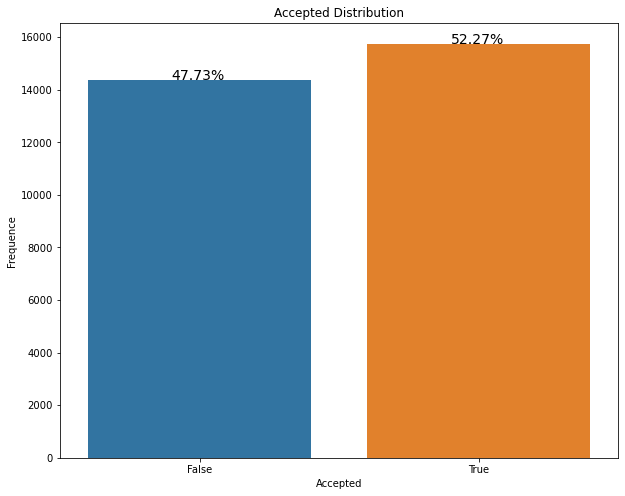

In [97]:
plt.figure(figsize=[10,8])
accepted = bpi_challenge_2017_data[bpi_challenge_2017_data['Accepted'] == True]['Selected']
ax = sns.countplot(accepted)
for p in ax.patches:
    (ax.annotate('{:.2f}%'.format(p.get_height()/len(accepted.dropna())*100), 
                 (p.get_x()+0.3, p.get_height()+1), fontsize=14))
ax.set_title("Accepted Distribution")
ax.set(xlabel="Accepted", ylabel="Frequence")
plt.show()

The *countplot* chart is a type of bar chart from the *seaborn* library that aims to show the frequency of each categorical class.

Similarly, we can calculate and visualize the distribution for other individual variables.

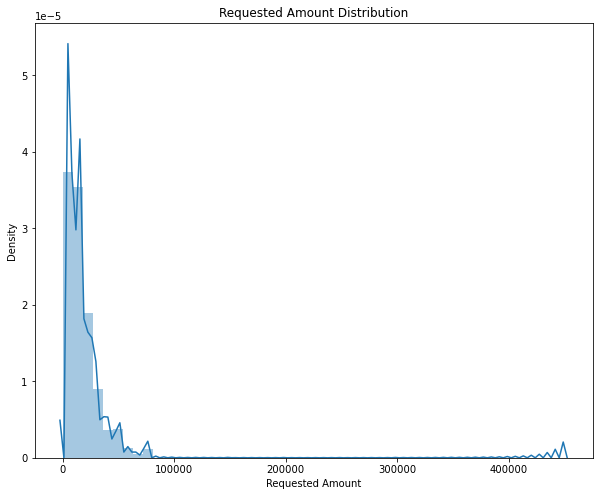

In [98]:
plt.figure(figsize=[10,8])
ax = sns.distplot(bpi_challenge_2017_data['case:RequestedAmount'])
ax.set_title("Requested Amount Distribution")
ax.set(xLabel="Requested Amount", yLabel="Density")
plt.show()

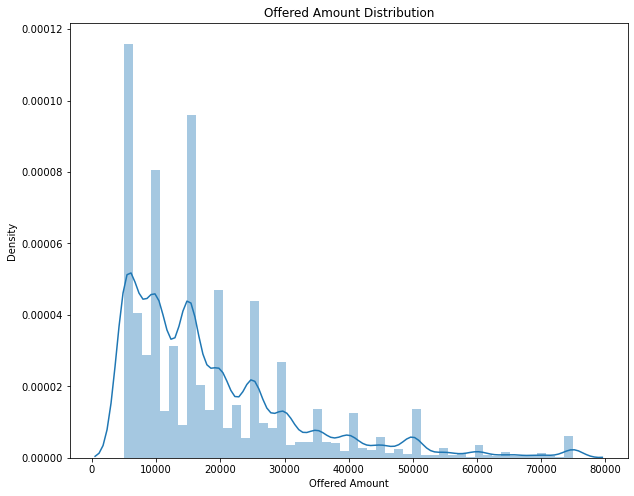

In [99]:
plt.figure(figsize=[10,8])
ax = sns.distplot(bpi_challenge_2017_data['OfferedAmount'])
ax.set_title("Offered Amount Distribution")
ax.set(xLabel="Offered Amount", yLabel="Density")
plt.show()

The *distplot* charts are density graphs with histogram showing the distribution and the probability of the values of the variables *RequestedAmount* and *OfferedAmount*, respectively.

# **Question 2: Offers with less than requested value are more likely to be rejected?**

To answer this question, we can see the frequency of accepted and rejected offers when the amount offered was less than the amount requested.

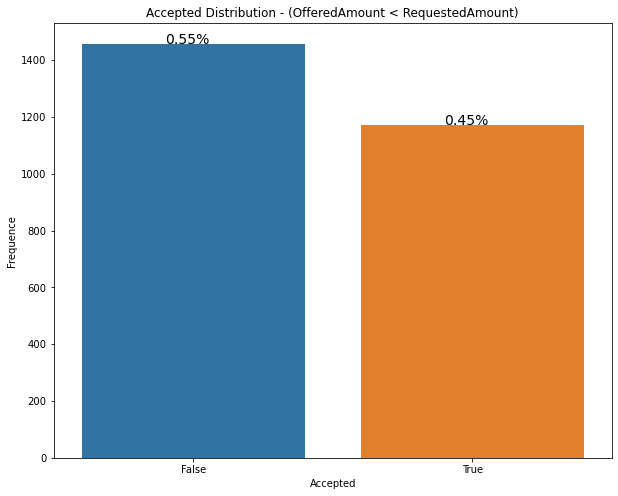

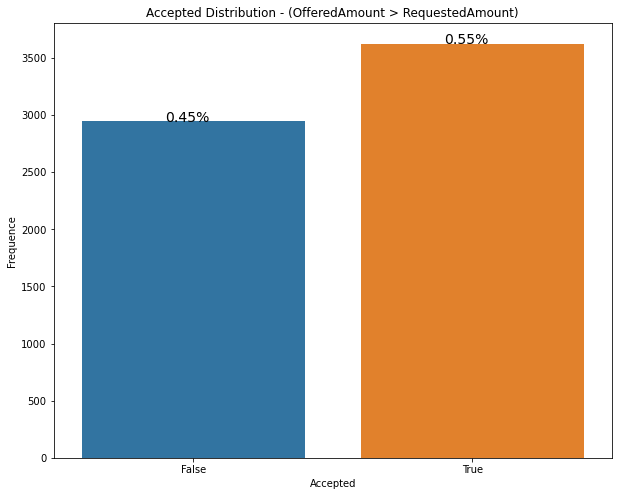

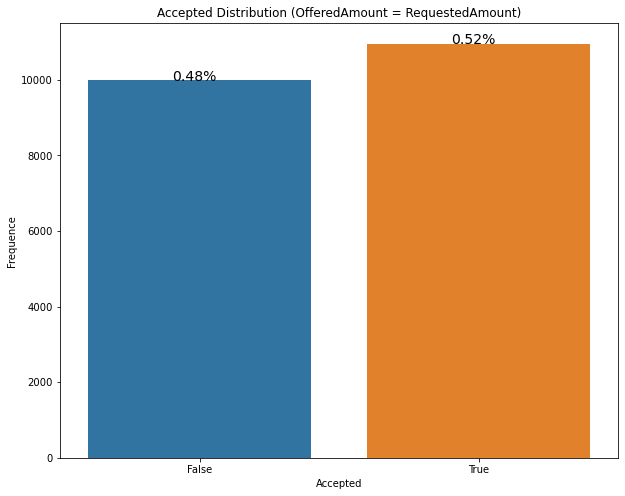

In [100]:
offered_less = (bpi_challenge_2017_data[(bpi_challenge_2017_data['OfferedAmount']) 
                                        < (bpi_challenge_2017_data['case:RequestedAmount'])])
offered_more = (bpi_challenge_2017_data[(bpi_challenge_2017_data['OfferedAmount']) 
                                        > (bpi_challenge_2017_data['case:RequestedAmount'])])
offered_eq = (bpi_challenge_2017_data[(bpi_challenge_2017_data['OfferedAmount']) 
                                     == (bpi_challenge_2017_data['case:RequestedAmount'])])
less_acc = offered_less[offered_less['Accepted'] == True]
more_acc = offered_more[offered_more['Accepted'] == True]
equal_acc = offered_eq[offered_eq['Accepted'] == True]

plt.figure(figsize=[10,8])
ax = sns.countplot(less_acc['Selected'])
for p in ax.patches:
    (ax.annotate('{:.2f}%'.format(p.get_height()/len(less_acc)), 
                 (p.get_x()+0.3, p.get_height()+1), fontsize=14))
ax.set_title("Accepted Distribution - (OfferedAmount < RequestedAmount)")
ax.set(xLabel="Accepted", yLabel='Frequence')

plt.figure(figsize=[10,8])
ax = sns.countplot(more_acc['Selected'])
for p in ax.patches:
    (ax.annotate('{:.2f}%'.format(p.get_height()/len(more_acc)), 
                 (p.get_x()+0.3, p.get_height()+1),fontsize=14))
ax.set_title("Accepted Distribution - (OfferedAmount > RequestedAmount)")
ax.set(xLabel="Accepted", yLabel='Frequence')

plt.figure(figsize=[10,8])
ax = sns.countplot(equal_acc['Selected'])
for p in ax.patches:
    (ax.annotate('{:.2f}%'.format(p.get_height()/len(equal_acc)), 
                 (p.get_x()+0.3, p.get_height()+1), fontsize=14))
ax.set_title("Accepted Distribution (OfferedAmount = RequestedAmount)")
ax.set(xLabel="Accepted", yLabel='Frequence')
plt.show()


To better answer the question, we can make comparisons with other analyzes. Compare with the frequency of declined offers when the offered value is greater than requested, and also when the offered value is equal to the requested value. We can say that more than half of the offers with less than the requested value can be refused.

# **Question 3: Which loan goal had the highest number of declined offers?**

To answer this question we can calculate and graphically display the number of offers grouped by loan objective.

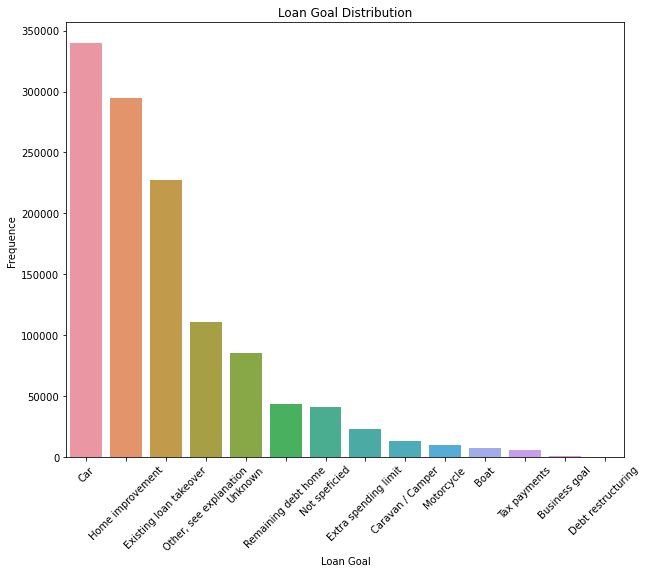

In [101]:
plt.figure(figsize=[10,8])
loan_goals_occ = bpi_challenge_2017_data['case:LoanGoal'].value_counts()
ax = sns.barplot( x=loan_goals_occ.index, y=loan_goals_occ)
ax.set(ylabel="Frequence", xlabel = "Loan Goal")
ax.set_title("Loan Goal Distribution")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.show()

In the bar graph above, we can see the distribution of the variable (LoanGoal) that shows the frequency of loan objectives.

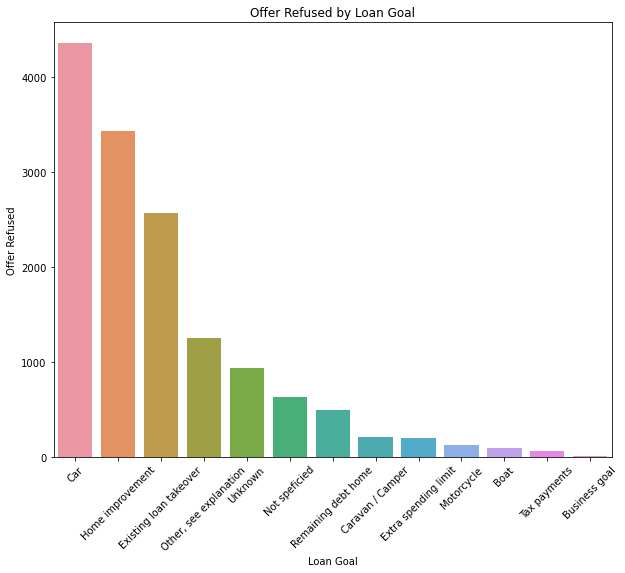

In [102]:
offer_refused = (bpi_challenge_2017_data[(bpi_challenge_2017_data['Accepted'] == True) 
                                         & (bpi_challenge_2017_data['Selected'] == False)])
grouped_by_lg = (offer_refused.groupby(['case:LoanGoal'])['Selected'].count()
                 .sort_values(ascending=False))

plt.figure(figsize=[10,8])
ax = sns.barplot(y=grouped_by_lg.values, x=grouped_by_lg.index)
ax.set(ylabel="Offer Refused", xlabel = "Loan Goal")
ax.set_title("Offer Refused by Loan Goal")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.show()

With the bar graph above we can see that the purpose of the loan application that had the most declined offers was 'Car' followed by 'Home improvement' and 'Existing loan takeover'.

We can perform other analyzes:

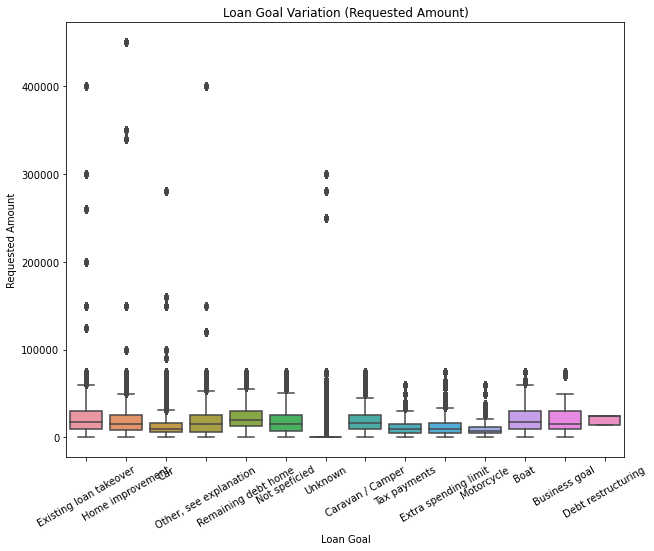

In [103]:
plt.figure(figsize=[10,8])
ax = sns.boxplot(data=bpi_challenge_2017_data, x='case:LoanGoal', y='case:RequestedAmount')
ax.set(xlabel="Loan Goal", ylabel = "Requested Amount")
ax.set_title("Loan Goal Variation (Requested Amount)")
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
plt.show()

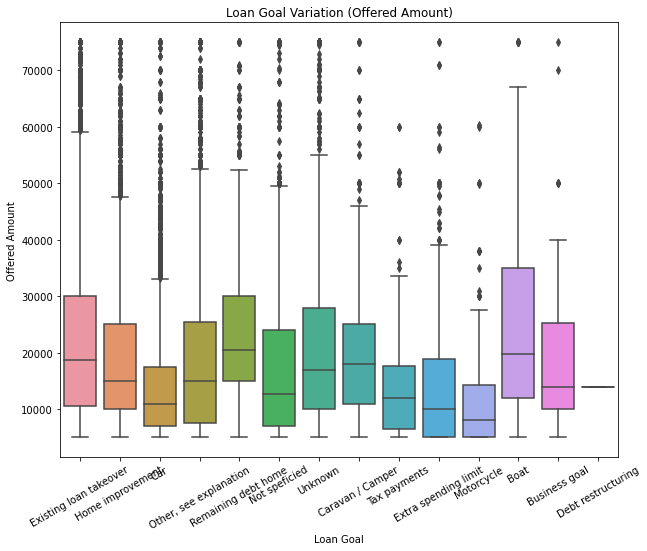

In [104]:
plt.figure(figsize=[10,8])
ax = sns.boxplot(data=bpi_challenge_2017_data, x='case:LoanGoal', y='OfferedAmount')
ax.set(xlabel="Loan Goal", ylabel = "Offered Amount")
ax.set_title("Loan Goal Variation (Offered Amount)")
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
plt.show()

The last two plotted graphs are bloxplots of the amount requested for loan objectives and the amount offered for loan objectives, respectively. The bloxplot represents the variation of the observed data, and we can make several analyzes, including visualizing outliers.

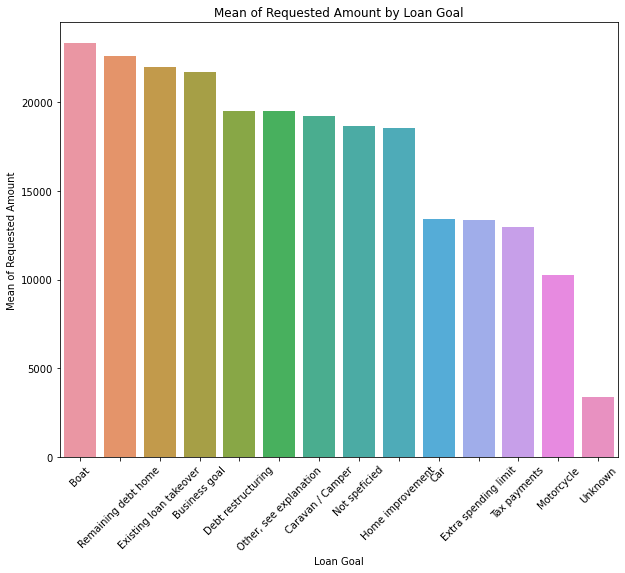

In [105]:
mean_per_loan_goal = (bpi_challenge_2017_data.groupby(['case:LoanGoal'])['case:RequestedAmount']
                      .mean().sort_values(ascending=False))
plt.figure(figsize=[10,8])
ax = sns.barplot(y=mean_per_loan_goal.values, x=mean_per_loan_goal.index)
ax.set(ylabel="Mean of Requested Amount", xlabel = "Loan Goal")
ax.set_title("Mean of Requested Amount by Loan Goal")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.show()

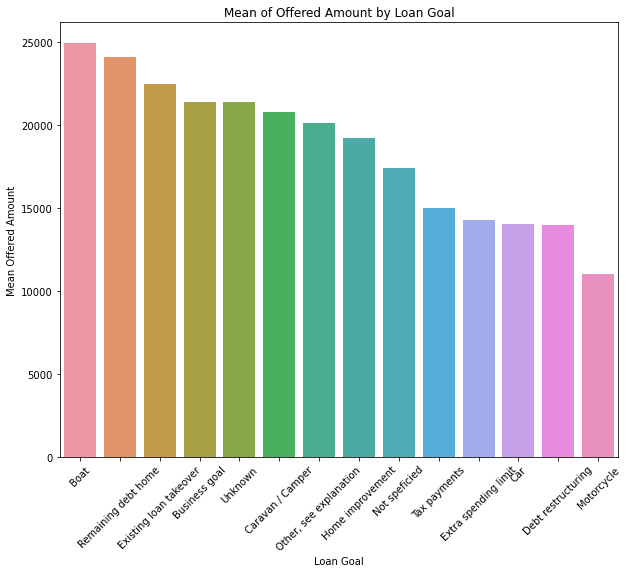

In [106]:
mean_per_loan_goal = (bpi_challenge_2017_data.groupby(['case:LoanGoal'])['OfferedAmount']
                      .mean().sort_values(ascending=False))
plt.figure(figsize=[10,8])
ax = sns.barplot(y=mean_per_loan_goal.values, x=mean_per_loan_goal.index)
ax.set(ylabel="Mean Offered Amount", xlabel = "Loan Goal")
ax.set_title("Mean of Offered Amount by Loan Goal")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.show()

The last two bar graphs show the average amount requested per loan objective and the average amount offered per loan objective, respectively.

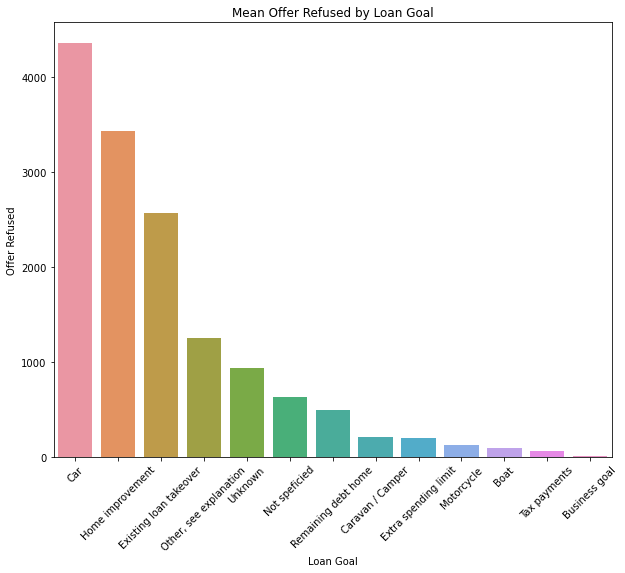

In [107]:
offer_refused = (bpi_challenge_2017_data[(bpi_challenge_2017_data['Accepted'] == True) 
                                         & (bpi_challenge_2017_data['Selected'] == False) ])
grouped_by_lg = (offer_refused.groupby(['case:LoanGoal'])['Selected'].count()
                 .sort_values(ascending=False))

plt.figure(figsize=[10,8])
ax = sns.barplot(y=grouped_by_lg.values, x=grouped_by_lg.index)
ax.set(ylabel="Offer Refused", xlabel = "Loan Goal")
ax.set_title("Mean Offer Refused by Loan Goal")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.show()

The last graph shows the average of offers declined for loan objectives.

# **Classification**

# **Question 4: Predict whether the loan will be successful at the end of the process.**

To perform this classification, we need to select the data for the two classes, the class of loans that worked and the class of those that did not.

# **Selecting features**

The following input variables (features) were chosen:

* case: RequestedAmount: Amount requested on the loan
* CreditScore: Customer credit score
* OfferedAmount: Amount offered

Initially we can create a new set with just the columns of interest to get the data we need.

In [108]:
df_model = (bpi_challenge_2017_data[['concept:name', 'case:concept:name', 'EventOrigin',
                                     'case:RequestedAmount', 'CreditScore', 'OfferedAmount']])
df_model.head()

,concept:name,case:concept:name,EventOrigin,case:RequestedAmount,CreditScore,OfferedAmount
0,A_Create Application,Application_652823628,Application,20000.0,NaN,NaN
1,A_Submitted,Application_652823628,Application,20000.0,NaN,NaN
2,W_Handle leads,Application_652823628,Workflow,20000.0,NaN,NaN
3,W_Handle leads,Application_652823628,Workflow,20000.0,NaN,NaN
4,W_Complete application,Application_652823628,Workflow,20000.0,NaN,NaN


# **Extracting the data**

For this model the Workflow data is not very interesting, so we can get it out.

In [109]:
df_model = df_model[df_model['EventOrigin'] != 'Workflow']
df_model.head()

,concept:name,case:concept:name,EventOrigin,case:RequestedAmount,CreditScore,OfferedAmount
0,A_Create Application,Application_652823628,Application,20000.0,NaN,NaN
1,A_Submitted,Application_652823628,Application,20000.0,NaN,NaN
5,A_Concept,Application_652823628,Application,20000.0,NaN,NaN
8,A_Accepted,Application_652823628,Application,20000.0,NaN,NaN
9,O_Create Offer,Application_652823628,Offer,20000.0,979.0,20000.0


In [110]:
# Aplications ok
app_ok = (df_model[(df_model['concept:name'] == 'A_Pending')]['case:concept:name']
          .drop_duplicates())
df_1 = df_model.merge(app_ok, on='case:concept:name')
df_1['label'] = df_1.apply(lambda x: 1, axis=1)
df_1.head()

,concept:name,case:concept:name,EventOrigin,case:RequestedAmount,CreditScore,OfferedAmount,label
0,A_Create Application,Application_652823628,Application,20000.0,NaN,NaN,1
1,A_Submitted,Application_652823628,Application,20000.0,NaN,NaN,1
2,A_Concept,Application_652823628,Application,20000.0,NaN,NaN,1
3,A_Accepted,Application_652823628,Application,20000.0,NaN,NaN,1
4,O_Create Offer,Application_652823628,Offer,20000.0,979.0,20000.0,1


In [111]:
# Aplications not ok
app_not_ok = (df_model[(~df_model['case:concept:name'].isin(app_ok.tolist()))]['case:concept:name']
              .drop_duplicates())
df_2 = df_model.merge(app_not_ok, on='case:concept:name')
df_2['label'] = df_2.apply(lambda x: 0, axis=1)
df_2.head()

,concept:name,case:concept:name,EventOrigin,case:RequestedAmount,CreditScore,OfferedAmount,label
0,A_Create Application,Application_1691306052,Application,10000.0,NaN,NaN,0
1,A_Submitted,Application_1691306052,Application,10000.0,NaN,NaN,0
2,A_Concept,Application_1691306052,Application,10000.0,NaN,NaN,0
3,A_Accepted,Application_1691306052,Application,10000.0,NaN,NaN,0
4,O_Create Offer,Application_1691306052,Offer,10000.0,0.0,6000.0,0


We now join the two sets into a single dataframe, overwriting it only with the columns that will be used in the model.

In [112]:
df_model = (pd.concat([df_1, df_2])[['case:concept:name', 'case:RequestedAmount', 
                                     'CreditScore', 'OfferedAmount', 'label']]
            .drop_duplicates())
df_model.sample(10)

,case:concept:name,case:RequestedAmount,CreditScore,OfferedAmount,label
81828,Application_1878767958,27000.0,883.0,27000.0,1
162939,Application_839059484,50000.0,NaN,NaN,1
4730,Application_891389450,30000.0,0.0,30000.0,1
249774,Application_1559634770,5000.0,969.0,5000.0,1
183595,Application_495329826,21000.0,0.0,21000.0,1
124779,Application_649459695,38250.0,NaN,NaN,0
127366,Application_1125299308,41400.0,0.0,41400.0,0
43864,Application_74083076,25000.0,NaN,NaN,1
208104,Application_399626423,5000.0,1044.0,5000.0,1
139795,Application_1885130117,0.0,NaN,NaN,0


The data of applications that gave ok were labeled with a value of 1 (Label column), while data that failed with a value of 0.

# **Checking and handling missing values**

In [113]:
df_model.isnull().sum().sort_values(ascending=False)

OfferedAmount           31509
CreditScore             31509
label                       0
case:RequestedAmount        0
case:concept:name           0
dtype: int64

Neste caso podemos remover as linhas com valores ausentes.

In [114]:
df_model = df_model.dropna(axis=0)
df_model.isnull().sum().sort_values(ascending=False)

label                   0
OfferedAmount           0
CreditScore             0
case:RequestedAmount    0
case:concept:name       0
dtype: int64

# **Separating resources**

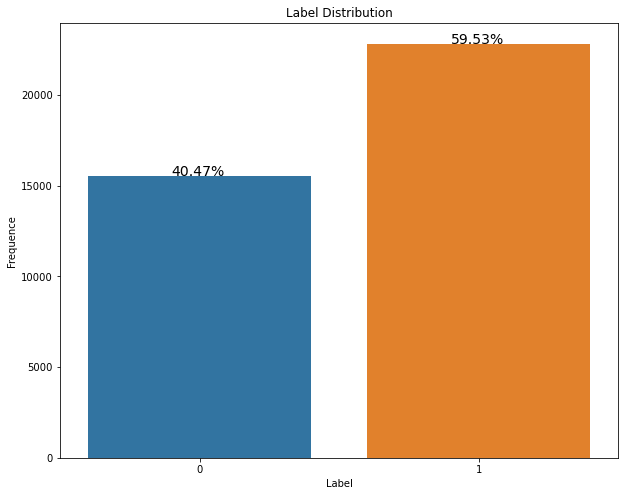

In [115]:
plt.figure(figsize=[10,8])
labels_occ = df_model['label']
ax = sns.barplot(data=df_model, x=labels_occ.value_counts().index, y=labels_occ.value_counts(), orient='v')
for p in ax.patches:
    (ax.annotate('{:.2f}%'.format(p.get_height()/len(labels_occ)*100), 
                 (p.get_x()+0.3, p.get_height()+1), fontsize=14))
ax.set(xlabel="Label", ylabel = "Frequence")
ax.set_title("Label Distribution")
plt.show()

The bar graph shows the distribution of labels (1 and 0) that represent the loan logs that worked and those that did not, respectively.

I used the *sklearn* library's *train_test_split* function to separate the data for training and testing. Usually 30% of the data is an ideal size for the test set and this is passed as a function parameter.

In [116]:
X_train, X_test = train_test_split(df_model['case:concept:name'].drop_duplicates(), test_size=0.3)
X_train = df_model.merge(X_train, on="case:concept:name")
X_test = df_model.merge(X_test, on="case:concept:name")

y_test = X_test['label']
y_train = X_train['label']
X_train = X_train.drop(['case:concept:name', 'label'], axis=1)
X_test = X_test.drop(['case:concept:name', 'label'], axis=1)

# **Building a model with Decision Tree**

1. We created a classifier using DecisionTreeClassifier from the *sklearn* library.
2. We perform the classifier training using the *fit* function.
3. We perform the prediction with the test data.

In [117]:
classifier_dt = DecisionTreeClassifier()
classifier_dt = classifier_dt.fit(X_train,y_train)
y_pred = classifier_dt.predict(X_test)

# **Evaluating the model**

Since we already have a trained model and perform a prediction, we can evaluate the model using several metrics:

* **Accuracy**: It is the number of data correctly predicted in all data sets. It tells you how accurate the model is.
* **Recall**: It is the proportion of positive observations correctly predicted in relation to the total of predicted observations.
* **Precision**: It is the proportion of positive observations correctly predicted in relation to the total of positive predicted observations. It's how accurate the model is.

In [118]:
accuracy = metrics.accuracy_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)

print("Accuracy: ", accuracy)
print("Recall: ", recall)
print("Precision: ", precision)

Accuracy:  0.7895057431256526
Recall:  0.721323638522036
Precision:  0.8998519067012217


For a better visualization of the prediction results of each class, we can create a confusion matrix. Confusion matrix is precisely a table that shows the frequency of classification for each class of the model.

In the confusion matrix:

* First quadrant is the *true positive* (TP): it occurs when in the real set, the class that is to be predicted was correctly predicted.
* Second quadrant is the *false positive* (FP): it occurs when in the real set, the class to be predicted was predicted incorrectly.
* Third quadrant is the *false negative* (FN): it occurs when in the real set, the class that is not intended to be predicted was incorrectly predicted.
* Fourth quadrant is the *true negative* (TN): it occurs when in the real set, the class that is not wanted to be predicted that was correctly predicted.

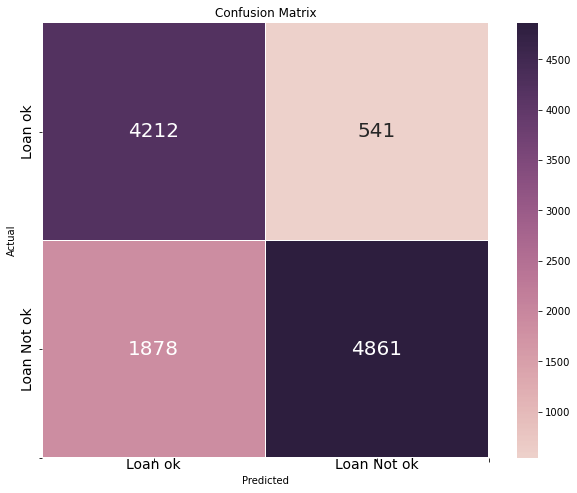

In [119]:
plt.figure(figsize=(10,8))
ax = (sns.heatmap(metrics.confusion_matrix(y_test, y_pred), annot=True, annot_kws={"size": 20}, 
                 linewidths=.1, fmt='d', cmap=sns.cubehelix_palette(as_cmap=True)))
plt.yticks([0.5,1.5,2], [ 'Loan ok', 'Loan Not ok'], va='center', fontsize=14)
plt.xticks([0.5,1.5,2], [ 'Loan ok', 'Loan Not ok'], va='center', fontsize=14)
ax.set_title("Confusion Matrix")
ax.set(xlabel="Predicted", ylabel="Actual");
plt.show()


We can calculate the importance of resources for the model, using the feature_importances_ attribute of the sklearn library classifier. And for the best visualization we can use a bar graph.

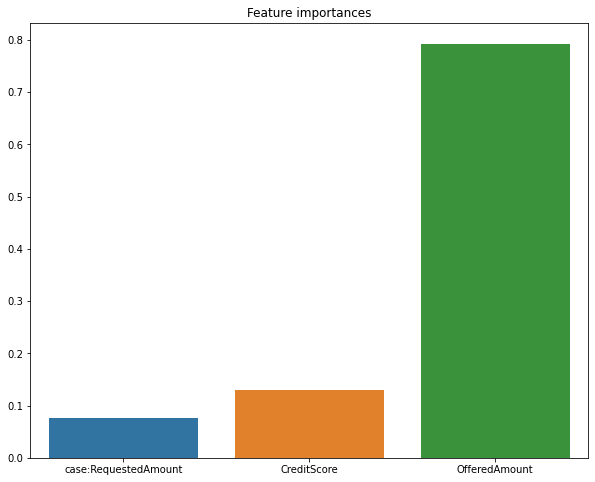

In [120]:
features = X_train.columns

features_importances = pd.Series(classifier_dt.feature_importances_, index=features)

plt.figure(figsize=[10,8])
ax = sns.barplot(x=features_importances.values, y=features_importances)
ax.set_title("Feature importances")
plt.xticks(list(range(len(features_importances))), features)
plt.show()

For this model offered Amount is a feature of high importance.

# **Regression**

# **Question 5:**

To predict the value the value of the offer, we already know that the dependent variable (output) is the value of the offer (OfferedAmount) and as they are continuous values the best to use is Regression. There are several types of regression, we will use multiple regression to make this prediction.

# **Selecting features**

The following input variables (features) were chosen:

* case: LoanGoal: The goal of the loan
* case: RequestedAmount: Amount requested on the loan
* CreditScore: Customer credit score
* OfferedAmount: Amount offered

Initially we can create a new set with just the columns of interest to get the data we need.

In [121]:
df_model_reg = (bpi_challenge_2017_data[['case:LoanGoal','case:RequestedAmount', 
                                         'CreditScore', 'OfferedAmount']])
df_model_reg.head()

,case:LoanGoal,case:RequestedAmount,CreditScore,OfferedAmount
0,Existing loan takeover,20000.0,NaN,NaN
1,Existing loan takeover,20000.0,NaN,NaN
2,Existing loan takeover,20000.0,NaN,NaN
3,Existing loan takeover,20000.0,NaN,NaN
4,Existing loan takeover,20000.0,NaN,NaN


# **Checking and handling missing values**

In [122]:
df_model_reg.isnull().sum().sort_values(ascending=False)

OfferedAmount           1159272
CreditScore             1159272
case:RequestedAmount          0
case:LoanGoal                 0
dtype: int64

In this case, we can remove the lines with missing values.

In [123]:
df_model_reg = df_model_reg.dropna(axis=0)
df_model_reg.isnull().sum().sort_values(ascending=False)

OfferedAmount           0
CreditScore             0
case:RequestedAmount    0
case:LoanGoal           0
dtype: int64

We use str.strip () to "trim" the data in all columns, if needed.

In [124]:
df_model_reg.columns.str.strip()

Index(['case:LoanGoal', 'case:RequestedAmount', 'CreditScore',
       'OfferedAmount'],
      dtype='object')

# **Separating resources**

We separate the data set into two variables, it depends (Y) that the output is independent (X) that are like inputs.

In [125]:
x = df_model_reg[['case:LoanGoal', 'case:RequestedAmount', 'CreditScore']]
y = df_model_reg[['OfferedAmount']]

We use *get_dummies* from the * pandas * library to convert categorical variables into numeric values. In this case only the column 'case: LoanGoal' is categorical.

In [126]:
x = pd.get_dummies(x, columns=['case:LoanGoal'])
x.head()

,case:RequestedAmount,CreditScore,case:LoanGoal_Boat,case:LoanGoal_Business goal,case:LoanGoal_Car,case:LoanGoal_Caravan / Camper,case:LoanGoal_Debt restructuring,case:LoanGoal_Existing loan takeover,case:LoanGoal_Extra spending limit,case:LoanGoal_Home improvement,case:LoanGoal_Motorcycle,case:LoanGoal_Not speficied,"case:LoanGoal_Other, see explanation",case:LoanGoal_Remaining debt home,case:LoanGoal_Tax payments,case:LoanGoal_Unknown
9,20000.0,979.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
50,10000.0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
79,15000.0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
87,15000.0,1059.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
135,5000.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


We use the *sklearn* library's *train_test_split* function to separate the data for training and testing. Usually 30% of the data is an ideal size for the test set and this is passed as a function parameter.

In [127]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

# **Building a model with Linear Regression**

1.  We created a regressor using LinearRegressor from the *sklearn* library.
2.  We perform regressor training using the *fit* function.
3.  We perform a prediction with the test data.


In [128]:
linear_regressor = LinearRegression()  
linear_regressor.fit(x_train, y_train)
y_pred = linear_regressor.predict(x_test)

# **Evaluating the model**

Since we already have a trained model and perform a prediction, we can evaluate the model using several metrics:

* Mean Absolute Error (MAE): Is the mean of the absolute value of the erro.
* Mean Squared Error (MSE) Is the mean of the squared errors.
* Root Mean Squared Error (RMSE): Is the square root of the mean of the squared errors.

In [129]:
mae = metrics.mean_absolute_error(y_test, y_pred)
mse =  metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print("Mean Absolute Error (MAE): ", mae)
print("Mean Squared Error (MSE)", mse)
print("Root Mean Squared Error (RMSE): ", rmse)

Mean Absolute Error (MAE):  4680.040356150159
Mean Squared Error (MSE) 87216837.65948316
Root Mean Squared Error (RMSE):  9338.995538037438


# **Conclusions**

In this notebook we explore the data made available by BPI Challenge 2017 in order to practice knowledge of data analysis, exploratory data analysis, machine learning, among others.

We analyzed the distribution of some variables in order to view accepted / rejected offers and what could influence an offer to be refused. We also created models to predict when a loan would be successful and also to know the value offered for an application.

The analyzes were carried out during studies to practice the knowledge of the acquired area, for more interpretations and decisions, more in-depth analyzes should be carried out.